In [1]:
#########################
# Author: Source of Truth Data Labss
# Date: 2018-09-02
# Version: 1.0
# Description: A brief Data Science template
# Revision History: 2018-09-02 Program creation
# Purpose: this code is meant to be compiled using Spyder for analysis of wine data          
#########################

In [2]:
#########################
# install requirements 
#########################

# %pip freeze > requirements.txt
# %pip install requirements

In [3]:
#########################
# import packages 
#########################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# from sklearn import bin


In [4]:
##############################
# import woe
##############################

# import woe.feature_process as fp
# import woe.GridSearch as gs
# from woe.eval import compute_ks


In [5]:
#########################
# import data
#########################

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
urlretrieve(link, 'winequality-red.csv')
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#########################
# ETL                   #       
#########################

# show column names
df.columns
# examine top 10 rows
df.head()
# number or rows and columns
df.shape
# simple summary table
df.pivot_table(values=["fixed acidity"], index=["quality"], aggfunc=np.mean)


,fixed acidity
quality,
3,8.360000
4,7.779245
5,8.167254
6,8.347179
7,8.872362
8,8.566667


In [7]:
# extract inputs
df_inputs = df.iloc[:,0:11]
# extract target/output
df_target = df['quality']
# summarize categories
df_target = df_target.astype('category')
# count the number of categories in quality
pd.crosstab(df["quality"],df["pH"],margins=True)

pH,2.74,2.86,2.87,2.88,2.89,2.9,2.92,2.93,2.94,2.95,...,3.7,3.71,3.72,3.74,3.75,3.78,3.85,3.9,4.01,All
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,53
5,0,0,0,1,2,0,3,1,2,0,...,0,0,2,1,0,0,0,0,0,681
6,0,1,1,0,2,1,0,2,2,0,...,1,1,0,0,0,1,1,1,2,638
7,0,0,0,0,0,0,1,0,0,1,...,0,3,0,0,0,1,0,0,0,199
8,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,18
All,1,1,1,2,4,1,4,3,4,1,...,1,4,3,1,1,2,1,2,2,1599


In [8]:
# remove spaces in column names

df.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

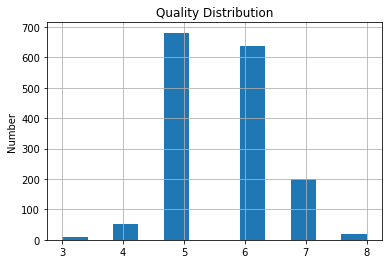

In [9]:
#########################
# EDA                   #       
#########################

df['quality'].hist(bins=12)
plt.title("Quality Distribution")
plt.ylabel("Number")
plt.show()

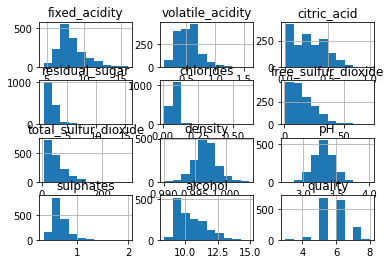

In [10]:
##########################
# create histograms
##########################

df.hist(bins=10)
plt.show()

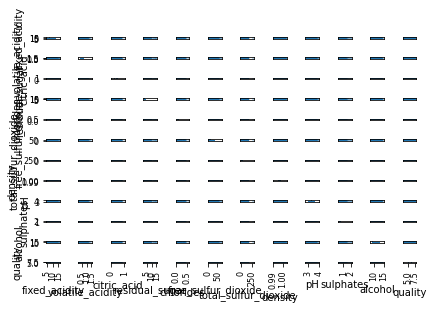

In [11]:
###############################
# Scatter plot 
# this is nonsense (need to increase view)
###############################

pd.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()

# plt.savefig('scatter_matrix.png')

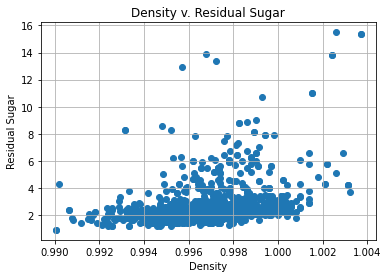

In [12]:
##############################
# pick out a single plot
# (update with javascript)
##############################

plt.scatter(df['density'], df['residual_sugar'])
plt.title("Density v. Residual Sugar")
plt.xlabel("Density")
plt.ylabel("Residual Sugar")
plt.grid()
plt.show()

In [13]:
#########################
# summarize             #       
#########################

# extract summary stats #

list(np.transpose(df.describe()))

np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
#########################
# correlation           #       
#########################

# np.corrcoef(df).round(3)

# wine_corr = df.corr()

# abs(wine_corr) > .5


In [15]:
##########################
# example of df
##########################

# pd.DataFrame(wine_corr['quality'])

In [16]:
#########################
# heatmap               #       
#########################

# sns.heatmap(wine_corr, xticklabels=wine_corr.columns, yticklabels=wine_corr.columns)

In [17]:
#########################
# Classifier 1          #       
#########################

train, test = train_test_split(df, test_size=0.3, random_state=3)

result = smf.ols('quality ~ volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH  + alcohol + sulphates ', data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.39
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.92e-146
Time:                        09:18:26   Log-Likelihood:                -1569.6
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3220.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.1796 

In [18]:
###################################
# define input and output
###################################

y = train["quality"]
cols = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","alcohol","sulphates"]

x = train[cols]

Training MSE: 0.427


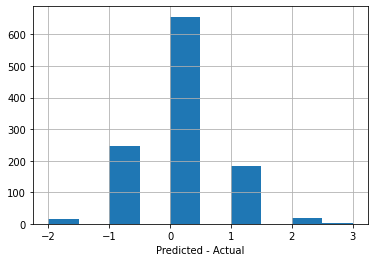

In [19]:
###################################
# build linear model
# need multinomial
###################################

regr = linear_model.LinearRegression()
regr.fit(x,y)

ytrain_pred = regr.predict(x)
print("Training MSE: %.3f" % mean_squared_error(y, ytrain_pred))

errors = ytrain_pred.round() - y
errors.hist(bins=10)
plt.xlabel("Predicted - Actual")
plt.show()


In [20]:
#########################
# now test on Test data #
#########################

y = test["quality"]
cols = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","alcohol","sulphates"]

x = test[cols]

ytest_pred = regr.predict(x)
print("Test MSE: %.3f" % mean_squared_error(y, ytest_pred))

Test MSE: 0.399


In [21]:
ytest_pred


array([5.07737767, 5.62313018, 5.91339364, 6.13453284, 5.0016581 ,
       5.47885097, 5.09337655, 6.16198997, 5.52123414, 5.78036195,
       5.63155506, 5.18820486, 5.23523093, 5.30831149, 6.48948926,
       5.0573124 , 5.86882766, 5.17679917, 6.0364562 , 6.35881473,
       6.43071622, 5.49417011, 5.80922149, 4.92385599, 5.15391371,
       5.48811568, 5.13400733, 6.54735867, 5.84318723, 5.77157885,
       6.09469498, 6.28191996, 4.90895933, 5.89649747, 5.11476425,
       5.96968746, 6.80341883, 4.98399305, 5.25205847, 5.89649747,
       5.17919264, 4.84297383, 6.47176237, 5.42113637, 5.33000669,
       5.82634125, 5.72937604, 5.26450724, 5.26636833, 5.48079868,
       5.09635827, 5.57923024, 6.01312582, 6.31556425, 5.48251941,
       5.39765225, 5.11607829, 4.88609692, 5.20505904, 5.0856538 ,
       4.74852232, 5.42313207, 5.25426892, 5.68337336, 5.87471321,
       6.52334011, 5.38384658, 5.72705863, 5.17366563, 5.97954014,
       5.65425755, 5.62586836, 5.72802824, 5.26736526, 6.00283

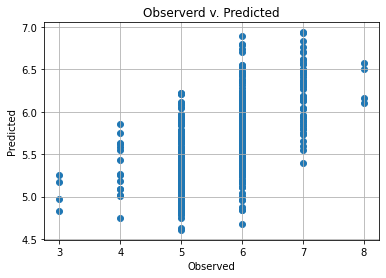

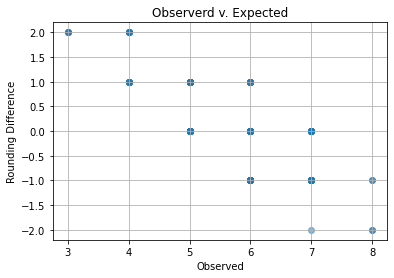

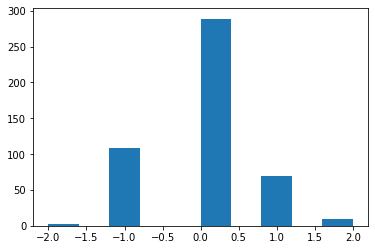

In [22]:
########################################################################
# object is to decrease MSE across models #
# to measure performance of this model need ROC, classification matrix #
# lets plot observed -  expected for this exercise #
########################################################################

plt.scatter(y, ytest_pred)
plt.title("Observerd v. Predicted")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

plt.scatter(y, ytest_pred.round() - y, alpha=0.5)
plt.title("Observerd v. Expected")
plt.xlabel("Observed")
plt.ylabel("Rounding Difference")
plt.grid()
plt.show()

errors = ytest_pred.round() - y
errors.hist(bins=10)
plt.grid()
plt.show()


In [23]:
# Separating out the features
x = df_inputs.values
# Separating out the target
y = df_target.values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
prinComp = pca.fit_transform(x)
prinDf = pd.DataFrame(data = prinComp , columns = ['principal component 1', 'principal component 2'])

prinDfFinal = pd.concat([prinDf, df[['quality']]], axis = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


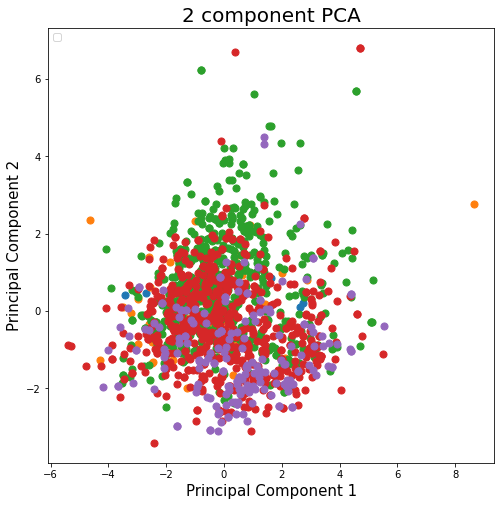

In [24]:
#########################
# princomp              #       
#########################

# Separating out the features
x = df_inputs.values
# Separating out the target
y = df_target.values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
prinComp = pca.fit_transform(x)
prinDf = pd.DataFrame(data = prinComp , columns = ['principal component 1', 'principal component 2'])

prinDfFinal = pd.concat([prinDf, df[['quality']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [3,4,5,6,7,8]
colors = ['r', 'g', 'b','y','o']
for targets, color in zip(targets,colors):
    indicesToKeep = prinDfFinal['quality'] == targets
    ax.scatter(prinDfFinal.loc[indicesToKeep, 'principal component 1']
               , prinDfFinal.loc[indicesToKeep, 'principal component 2']
               # , c = color
               , s = 50)
    
# pca.explained_variance_ratio_
plt.legend(loc='upper left', frameon=True)
# plt.grid()

In [25]:
##########################################
# let's do my woe package
# convert continuous to discrete
# this is for the woe analysis
##########################################

x=pd.DataFrame(x)
x.columns=cols

# df.head()
# df['quality'].astype('int64')


In [26]:
x_disc=x.apply(pd.cut, bins=2)

In [27]:
x_disc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,alcohol,sulphates
0,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(0.414, 4.528]","(-1.946, 2.991]","(-1.905, 1.152]"
1,"(-2.144, 1.109]","(1.8, 5.878]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(-3.546, 0.0707]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]"
2,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]"
3,"(1.109, 4.355]","(-2.286, 1.8]","(1.176, 3.744]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]"
4,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(0.414, 4.528]","(-1.946, 2.991]","(-1.905, 1.152]"


In [28]:
##########################################
# let's do the woe analysis
##########################################

# convert text to number
# (if needed)
# df['quality_flt']=LabelEncoder().fit_transfrom(df.quality)

x_disc['quality']=df['quality']
x_disc.head()
x_disc.dtypes




fixed_acidity           category
volatile_acidity        category
citric_acid             category
residual_sugar          category
chlorides               category
free_sulfur_dioxide     category
total_sulfur_dioxide    category
density                 category
pH                      category
alcohol                 category
sulphates               category
quality                    int64
dtype: object

In [29]:
x_disc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,alcohol,sulphates,quality
0,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(0.414, 4.528]","(-1.946, 2.991]","(-1.905, 1.152]",5
1,"(-2.144, 1.109]","(1.8, 5.878]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(-3.546, 0.0707]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]",5
2,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]",5
3,"(1.109, 4.355]","(-2.286, 1.8]","(1.176, 3.744]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(-3.709, 0.414]","(-1.946, 2.991]","(-1.905, 1.152]",6
4,"(-2.144, 1.109]","(-2.286, 1.8]","(-1.397, 1.176]","(-1.173, 4.016]","(-1.617, 4.762]","(-1.429, 1.972]","(-1.239, 3.072]","(0.0707, 3.68]","(0.414, 4.528]","(-1.946, 2.991]","(-1.905, 1.152]",5


In [30]:
# x_disc.loc[:,['fixed_acidity', 'quality']].pivot_table()
# pd.pivot_table(x_disc,values=["fixed_acidity"], index=["chlorides"], aggfunc='count')
pd.pivot_table(x_disc,values=["quality"], index=["chlorides", 'fixed_acidity'], aggfunc='count')
# x_disc['chlorides'].value_counts()


quality
chlorides       fixed_acidity           
(-1.617, 4.762] (-2.144, 1.109]     1354
                (1.109, 4.355]       223
(4.762, 11.127] (-2.144, 1.109]       21
                (1.109, 4.355]         1

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

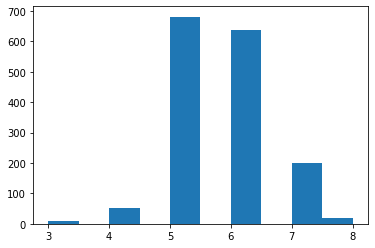

In [31]:
############################
# still need to binarize y for woe
############################

plt.hist(x_disc['quality'])

In [32]:

# fd_path = os.getcwd()+'/features_detail.csv'

# att = pd.read_csv(fd_path)

# plt.figure(figsize=(16,8))
# plt.barh(att2['var_name'], att2['iv_list']*10, color = '#317DC2')
# plt.xlabel('Information Value')
# plt.title('Information Value by Features', fontweight="bold")
# plt.grid()
# plt.show()

In [33]:
##########################################
# let's use and my sagemaker
##########################################



# I know there is formatting issue with the code, but it works here
# will address in future
# I believe it is number -> character in the labels/legend

##########################################
# would like to compare to decision tree #  
# perhaps in the future                  #   
##########################################





In [34]:
###################################
# fit logistic
###################################

# train, test = train_test_split(df, test_size=0.3, random_state=3)

# result = smf.ols('quality ~ volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH  + alcohol + sulphates ', data=df).fit()

# print(result.summary())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [35]:
# create additional flag 

df['quality_flag'] = (df['quality'] >= 7)

In [36]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [37]:
train2, test2 = train_test_split(df, test_size=0.3, random_state=3)

In [38]:
x_in=df.loc[:,['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
y_in=df.loc[:,'quality_flag']
# ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

In [39]:
# train2.shape

In [40]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [41]:
model.fit(x_in, y_in)

LogisticRegression(random_state=0, solver='liblinear')

In [42]:
model.coef_

array([[-0.06383537, -2.76955559,  0.25701571,  0.10234092, -1.57629003,
         0.01391597, -0.01721925, -1.43782268, -2.52949107,  2.15474612,
         0.92372159]])

In [43]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
model.coef_

array([[-0.06383537, -2.76955559,  0.25701571,  0.10234092, -1.57629003,
         0.01391597, -0.01721925, -1.43782268, -2.52949107,  2.15474612,
         0.92372159]])

In [45]:
cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'alcohol',
 'sulphates']

In [46]:
# Prob.s

probs=pd.DataFrame(model.predict_proba(x_in), columns=('prob0', 'prob1')).round(3)

In [47]:
# pd.pivot_table(y_in,model.predict(x_in))
model.score(x_in, y_in)

0.8792995622263915

In [48]:
confusion_matrix(y_in, model.predict(x_in))

array([[1346,   36],
       [ 157,   60]])

In [49]:
df2=pd.concat([df,probs],axis=1)

In [50]:
###################################
# Classification and roc curve
###################################


print(classification_report(y_in, model.predict(x_in)))


              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1382
        True       0.62      0.28      0.38       217

    accuracy                           0.88      1599
   macro avg       0.76      0.63      0.66      1599
weighted avg       0.86      0.88      0.86      1599



In [51]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_flag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,False
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,False
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,False
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [52]:
from sklearn import metrics

/Users/danielcovarrubias/Projects/sot_interview_prep/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


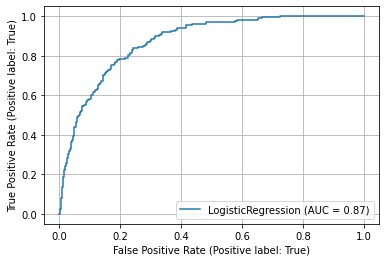

In [53]:
metrics.plot_roc_curve(model, x_in, y_in) 
plt.grid()

(array([  5.,  18.,  76., 155., 257., 218., 153.,  77.,  28.,  13.]),
 array([-30.8867891 , -24.73723203, -18.58767496, -12.43811789,
         -6.28856082,  -0.13900376,   6.01055331,  12.16011038,
         18.30966745,  24.45922452,  30.60878159]),
 <BarContainer object of 10 artists>)

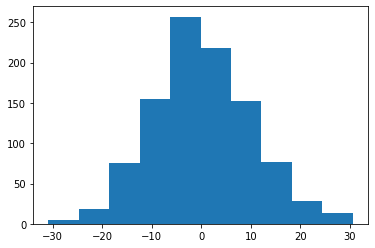

In [54]:
#####################
# create normal scatter plot
#####################

x=np.random.normal(0, 10, 1000)
plt.hist(x)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


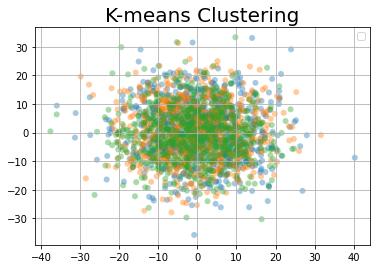

In [55]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    # x, y = np.random.rand(2, n)
    x=np.random.normal(0, 10, n)
    y=np.random.normal(0, 10, n)
    # scale = 200.0 * np.random.rand(n)
    # scale = np.random.normal(0, 10, n)
    ax.scatter(x
               , y
               , c=color
               # , s=scale
               # , label=[['Group1', 'Group 2', 'Group 3']]
               , alpha=0.4
               , edgecolors='none'
               )

ax.set_title('K-means Clustering', fontsize = 20)
ax.legend(loc=1)
ax.grid(True)

plt.show()

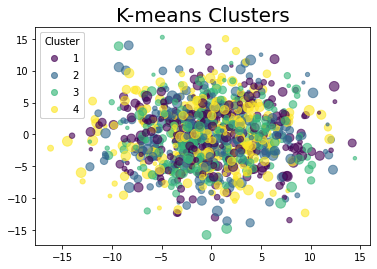

In [56]:
N = 1000
# x, y = np.random.rand(2, N)
x=np.random.normal(0, 5, N)
y=np.random.normal(0, 5, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 100, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s, alpha=0.6)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
ax.set_title('K-means Clusters', fontsize = 20)
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

# plt.grid()
# plt.show()
plt.savefig('/Users/danielcovarrubias/Projects/sot_interview_prep/images/testImage.jpg')


In [17]:
set(lst)

{1, 2, 3, 4, 6, 8, 9}